In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/german_credit.csv')

In [3]:
df.describe(include ='all')

checking_acc     duration    credit_hist     purpose  credit_amount  \
count          1000  1000.000000           1000        1000    1000.000000   
unique            4          NaN              5          10            NaN   
top          no_acc          NaN  existing_paid  television            NaN   
freq            394          NaN            530         280            NaN   
mean            NaN    20.903000            NaN         NaN    3271.258000   
std             NaN    12.058814            NaN         NaN    2822.736876   
min             NaN     4.000000            NaN         NaN     250.000000   
25%             NaN    12.000000            NaN         NaN    1365.500000   
50%             NaN    18.000000            NaN         NaN    2319.500000   
75%             NaN    24.000000            NaN         NaN    3972.250000   
max             NaN    72.000000            NaN         NaN   18424.000000   

       savings_acc employment_since  installment_rate   status_sex guarantor  \
count         1000             1000       1000.000000         1000      1000   
unique           5                5               NaN            4         3   
top            low             four               NaN  male_single      none   
freq           603              339               NaN          548       907   
mean           NaN              NaN          2.973000          NaN       NaN   
std            NaN              NaN          1.118715          NaN       NaN   
min            NaN              NaN          1.000000          NaN       NaN   
25%            NaN              NaN          2.000000          NaN       NaN   
50%            NaN              NaN          3.000000          NaN       NaN   
75%            NaN              NaN          4.000000          NaN       NaN   
max            NaN              NaN          4.000000          NaN       NaN   

        ...  property          age  other_installments housing  \
count   ...      1000  1000.000000                1000    1000   
unique  ...         4          NaN                   3       3   
top     ...     other          NaN                none     own   
freq    ...       332          NaN                 814     713   
mean    ...       NaN    35.546000                 NaN     NaN   
std     ...       NaN    11.375469                 NaN     NaN   
min     ...       NaN    19.000000                 NaN     NaN   
25%     ...       NaN    27.000000                 NaN     NaN   
50%     ...       NaN    33.000000                 NaN     NaN   
75%     ...       NaN    42.000000                 NaN     NaN   
max     ...       NaN    75.000000                 NaN     NaN   

       existing_credits      job no_people_liable  Telephone foreign_worker  \
count       1000.000000     1000      1000.000000       1000           1000   
unique              NaN        4              NaN          2              2   
top                 NaN  skilled              NaN         no            yes   
freq                NaN      630              NaN        596            963   
mean           1.407000      NaN         1.155000        NaN            NaN   
std            0.577654      NaN         0.362086        NaN            NaN   
min            1.000000      NaN         1.000000        NaN            NaN   
25%            1.000000      NaN         1.000000        NaN            NaN   
50%            1.000000      NaN         1.000000        NaN            NaN   
75%            2.000000      NaN         1.000000        NaN            NaN   
max            4.000000      NaN         2.000000        NaN            NaN   

        cost_matrix  
count   1000.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       1.300000  
std        0.458487  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        2.000000  

[11 rows x 21 columns]

In [4]:
#Spliting the data
x= df.iloc[:,:-1] # independent
y= df.iloc[:,-1] # dependent

In [13]:
# create Dummies
Xd = pd.get_dummies(x) #with dummy columns
Xd.head()

duration  credit_amount  installment_rate  residence_since  age  \
0         6           1169                 4                4   67   
1        48           5951                 2                2   22   
2        12           2096                 2                3   49   
3        42           7882                 2                4   45   
4        24           4870                 3                4   53   

   existing_credits  no_people_liable  checking_acc_high  checking_acc_low  \
0                 2                 1                  0                 1   
1                 1                 1                  0                 0   
2                 1                 2                  0                 0   
3                 1                 2                  0                 1   
4                 2                 2                  0                 1   

   checking_acc_medium  ...  housing_own  housing_rent  job_management  \
0                    0  ...            1             0               0   
1                    1  ...            1             0               0   
2                    0  ...            1             0               0   
3                    0  ...            0             0               0   
4                    0  ...            0             0               0   

   job_skilled  job_unemployed  job_unskilled  Telephone_no  Telephone_yes  \
0            1               0              0             0              1   
1            1               0              0             1              0   
2            0               0              1             1              0   
3            1               0              0             1              0   
4            1               0              0             1              0   

   foreign_worker_no  foreign_worker_yes  
0                  0                   1  
1                  0                   1  
2                  0                   1  
3                  0                   1  
4                  0                   1  

[5 rows x 61 columns]

In [14]:
# Splitting the data in train and test
from sklearn.model_selection import train_test_split
Xd_train,Xd_test,y_train,y_test = train_test_split(Xd,y,test_size=0.3,random_state=40)
print(Xd_train.shape,Xd_test.shape,y_train.shape,y_test.shape)

(700, 61) (300, 61) (700,) (300,)


In [15]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Classification tree
from sklearn.tree import export_graphviz # Visualising Tree

In [16]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None)

In [17]:
# training model
model.fit(Xd_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score,roc_auc_score
from sklearn.metrics import roc_curve,auc

In [19]:
y_pred = model.predict(Xd_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)
cr= classification_report(y_test,y_pred)
print(cr)
print('-'*20)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("Kappa Score: ",kappa_score)
print("-"*20)
auc_score = roc_auc_score(y_test,y_pred)
print("AUC Score: ",auc_score)

[[174  44]
 [ 52  30]]
--------------------
              precision    recall  f1-score   support

           1       0.77      0.80      0.78       218
           2       0.41      0.37      0.38        82

    accuracy                           0.68       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.67      0.68      0.67       300

--------------------
Kappa Score:  0.16916685898915307
--------------------
AUC Score:  0.5820093980756321


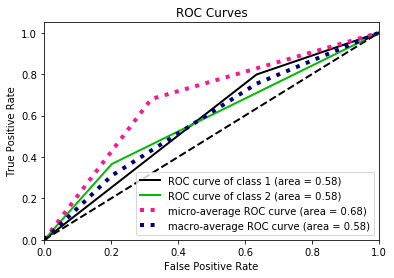

In [20]:
import scikitplot as skplot
skplot.metrics.plot_roc(y_test,model.predict_proba(Xd_test))
plt.show()

In [21]:
# Roc Curve
y_prob_pred = model.predict_proba(Xd_test)
y_prob = y_prob_pred[:,1]

In [22]:
y_test[y_test==2] = 0
y_test[y_pred==2] = 0

In [23]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)

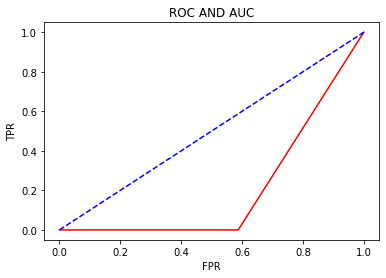

In [24]:
# ROC amd AUC
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('FPR'),plt.ylabel('TPR')
plt.title("ROC AND AUC")
plt.show()

In [25]:
!pip install pydotplus

In [26]:
import pydotplus
export_graphviz(model,out_file='credit.odt',feature_names=Xd_train.columns,filled = True)

In [27]:
graph = pydotplus.graph_from_dot_file('credit.odt')

In [21]:
graph.write_jpg('credit_tree.jpg')

True

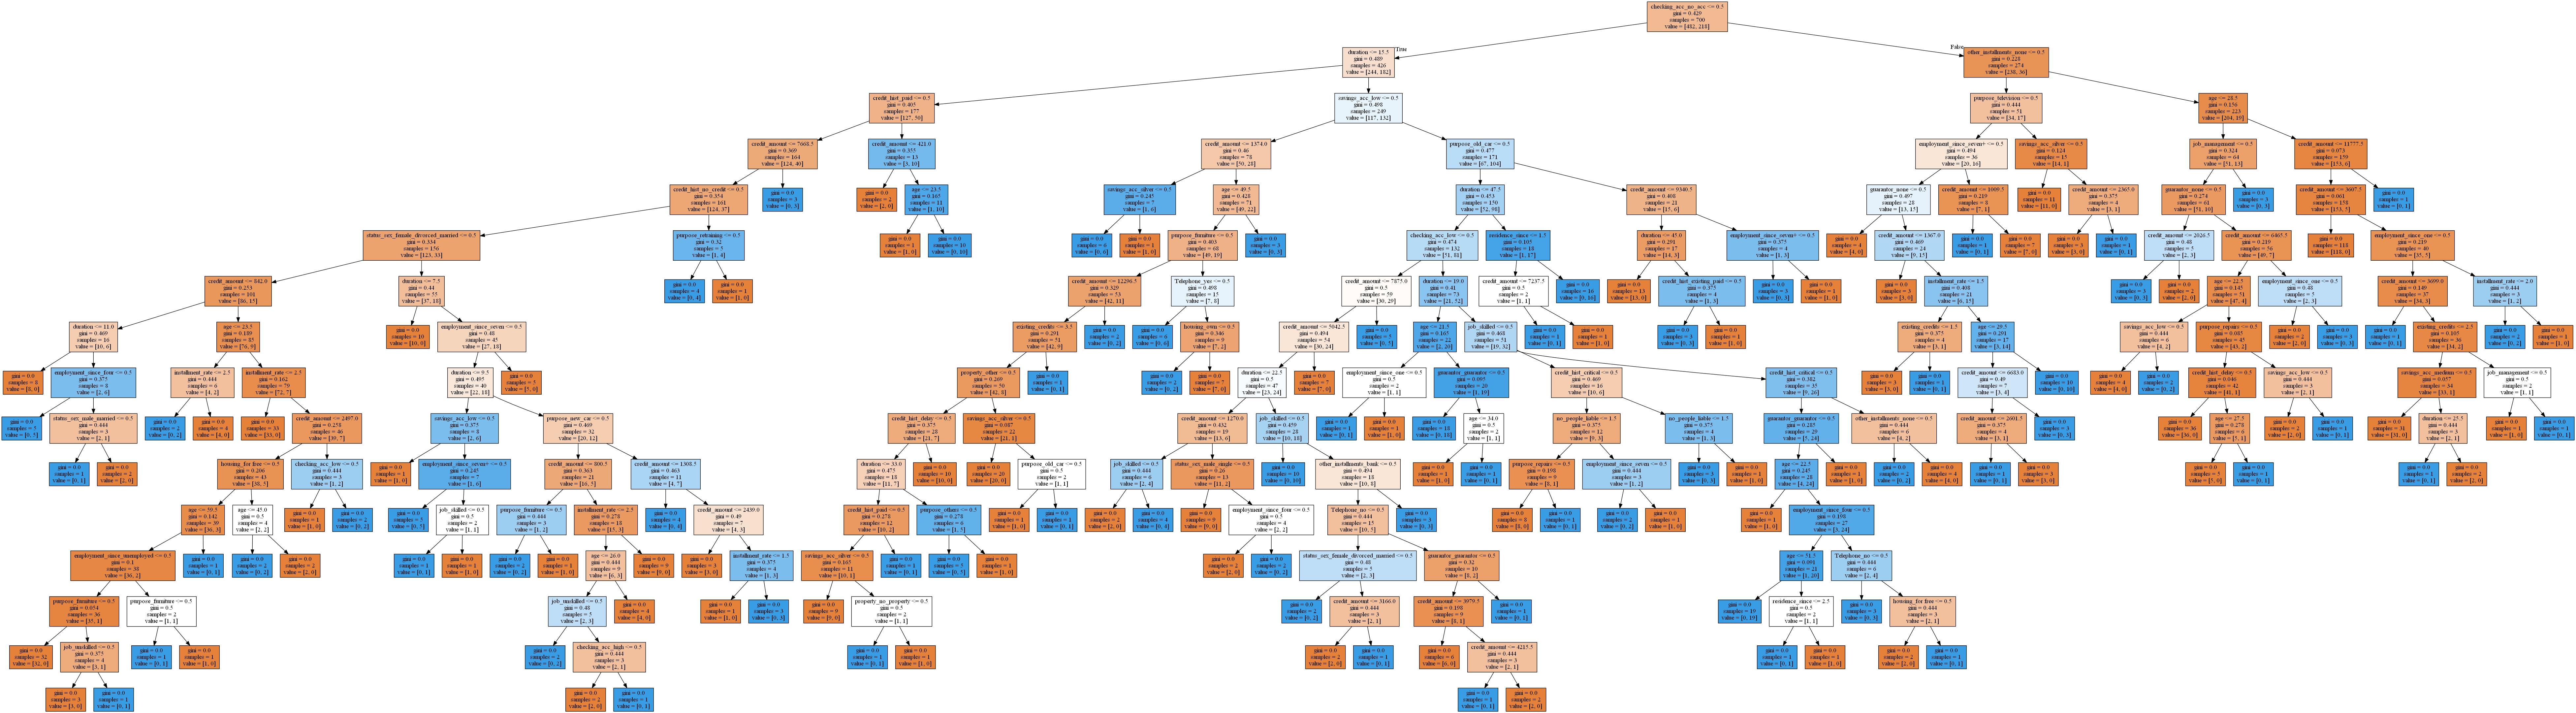

In [22]:
from IPython.display import Image
Image("Credit_tree.jpg")

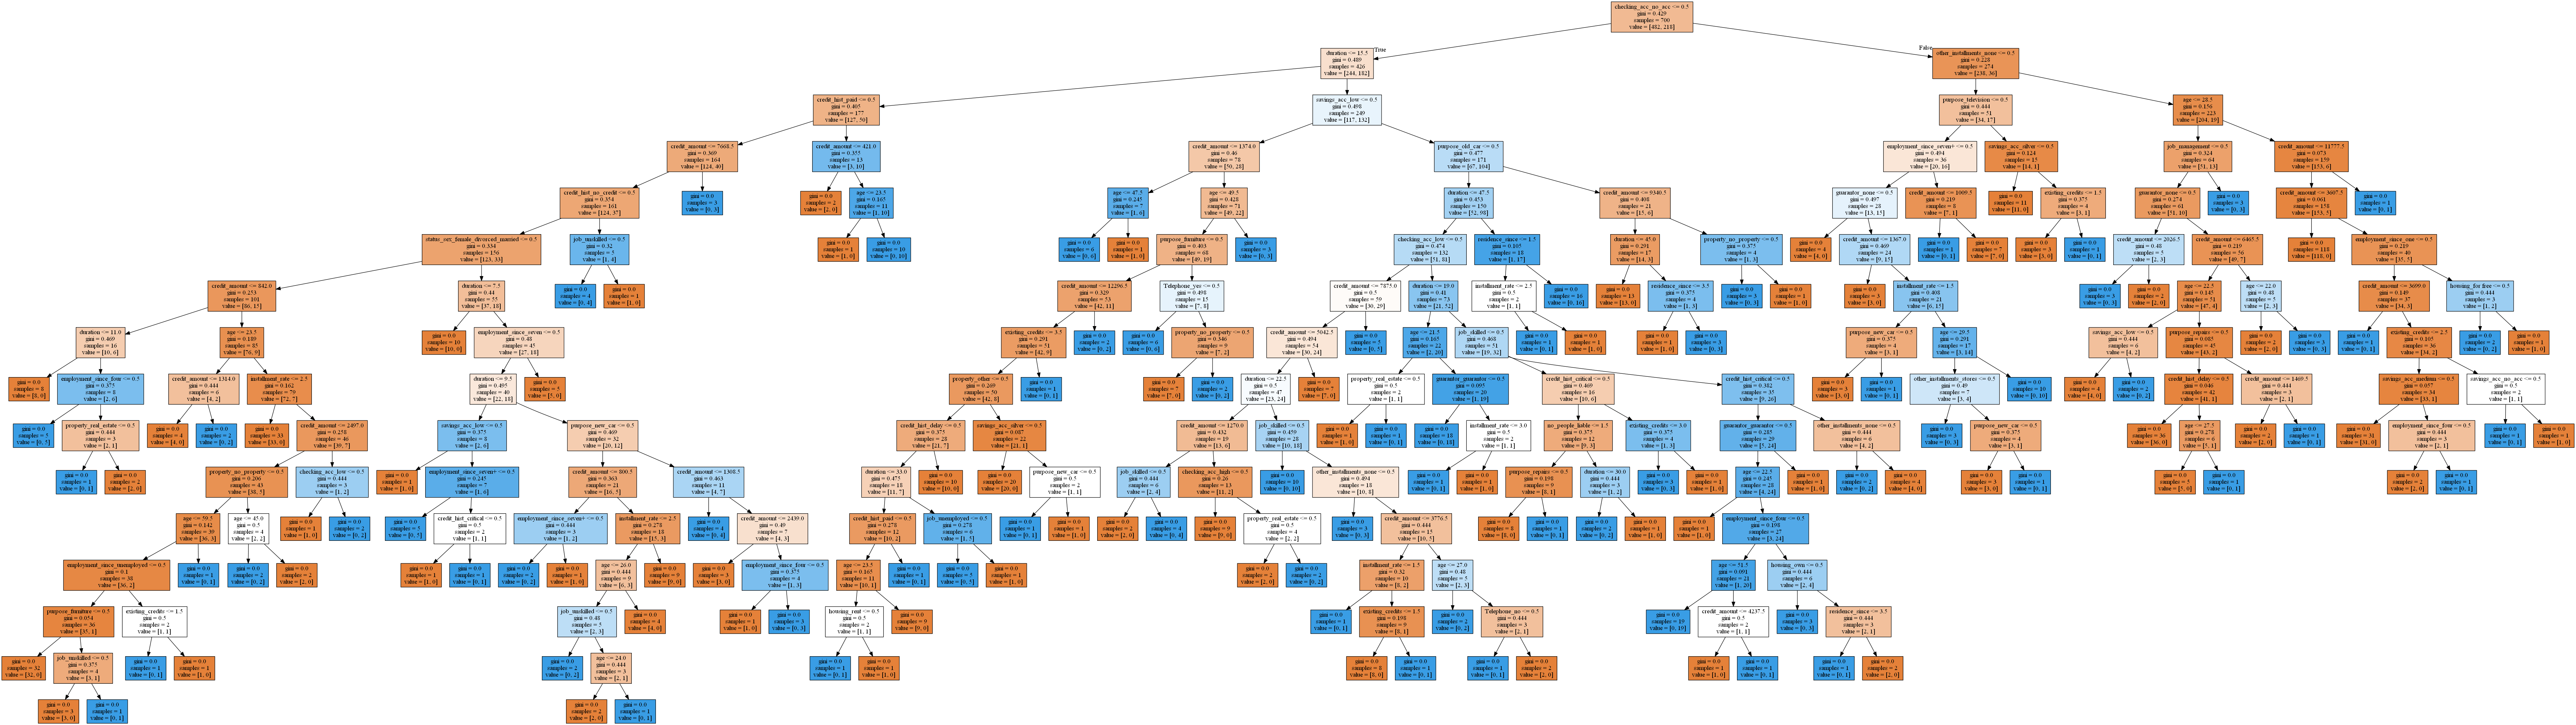

In [23]:
from IPython.display import Image
Image(graph.create_png())

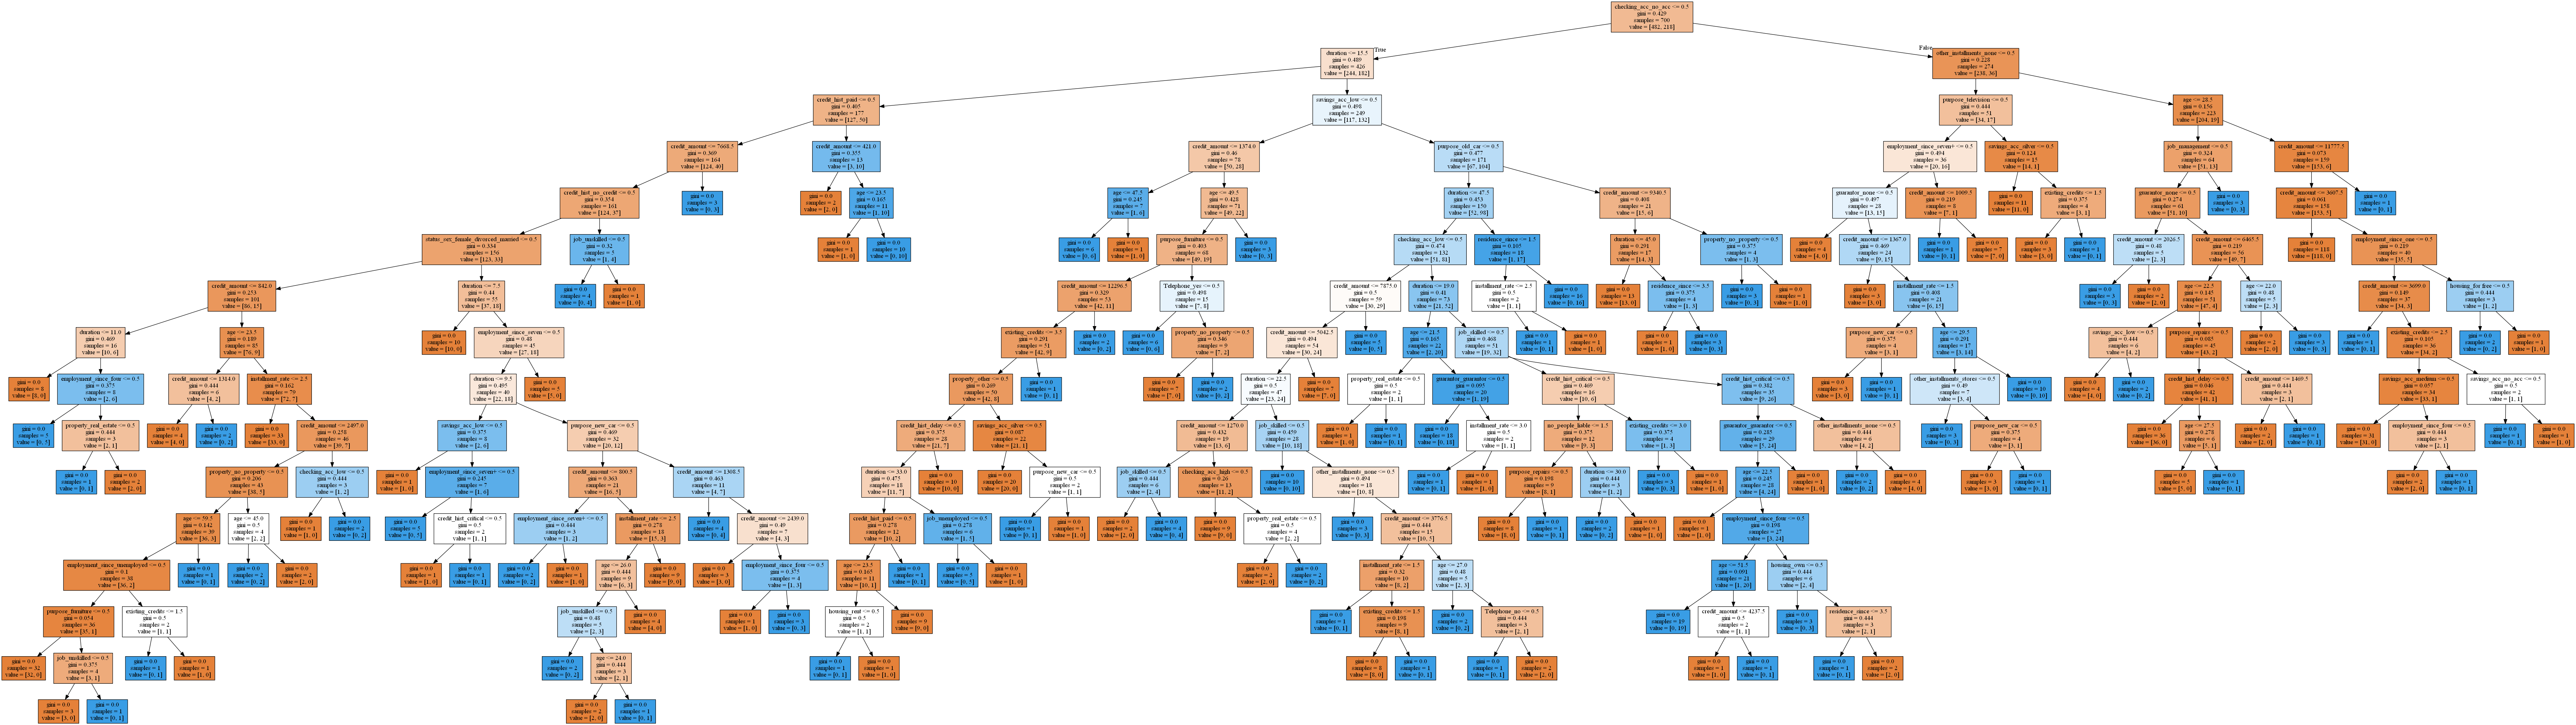

In [24]:
from IPython.display import Image
Image(graph.create_png())

In [23]:
df.shape

(1000, 21)

In [28]:
nums_list = [ i for i in range(1, 26)]

In [29]:
print(nums_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [31]:
kf = KFold(n_splits=5, shuffle=False).split(range(25))

print('{} {:^61} {}'.format('Iteration', 'Training Set Observations', 'Testing Set Observations'))

for iteration, data in enumerate(kf, start = 1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training Set Observations                   Testing Set Observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Dataset contains 25 observations
* 5-fold cross-validation, thus it runs for five iterations

In [28]:
model_tune = DecisionTreeClassifier()

In [29]:
tuned_parameter = [{'criterion' : ['gini', 'entropy'], 'max_depth':range(2,10)}] # hyper parameters

In [31]:
clf = GridSearchCV(model_tune, param_grid=tuned_parameter, cv = 10, scoring='roc_auc')
clf.fit(Xd_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [32]:
clf.best_score_

0.7440416832317343

In [33]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, Xd_train, y_train, cv=10, scoring='accuracy')
print(scores)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will

[0.71830986 0.61971831 0.72857143 0.71428571 0.62857143 0.6
 0.7        0.62857143 0.79710145 0.73913043]


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
